In [42]:
from fedn import APIClient
import time
import uuid
import json
import matplotlib.pyplot as plt
import numpy as np
import collections

In [43]:
DISCOVER_HOST = '127.0.0.1'
DISCOVER_PORT = 8092
client = APIClient(DISCOVER_HOST, DISCOVER_PORT)

In [44]:
client.set_package('package.tgz', 'numpyhelper')
client.set_initial_model('seed.npz')
seed_model = client.get_initial_model()

In [45]:
client.list_clients()

{'count': 1,
 'result': [{'combiner': 'combiner',
   'combiner_preferred': False,
   'id': 'client1',
   'ip': '172.18.0.7',
   'last_seen': 'Fri, 10 May 2024 17:13:37 GMT',
   'status': 'online'}]}

In [46]:
session_id = "experiment_fedavg"

session_config_fedavg = {
                        "helper": "numpyhelper", 
                        "session_id": session_id, 
                        "aggregator": "fedavg", 
                        "model_id": seed_model['model_id'], 
                        "rounds": 1, 
                        "round_timeout": 180000, 
                        "validate": True
                        }

result_fedavg = client.start_session(**session_config_fedavg)

In [47]:
client.session_is_finished(session_id)

False

In [38]:
session_id = "experiment_fedavg"
models = client.get_model_trail()

In [19]:
acc = []
for model in models:
    validations = client.list_validations()
print(validations)

{'6630f965e11f0e54ff81f6e9': {'data': '{"rouge1": 0.20375662861129532, "rouge2": 0.06204081302370931, "rougeL": 0.14874976770693352, "rougeLsum": 0.1479200279935418}', 'meta': '', 'model_id': 'b5f45078-2dbf-4de8-9674-7813f53ca534', 'receiver': {'name': 'combiner', 'role': 'COMBINER'}, 'sender': {'name': 'client2', 'role': 'WORKER'}, 'timestamp': '2024-04-30T14:00:05.661891Z'}, '6630f96ae11f0e54ff81f6eb': {'data': '{"rouge1": 0.20378782575476656, "rouge2": 0.0625074811480131, "rougeL": 0.1469906246672401, "rougeLsum": 0.1477260358562811}', 'meta': '', 'model_id': 'b5f45078-2dbf-4de8-9674-7813f53ca534', 'receiver': {'name': 'combiner', 'role': 'COMBINER'}, 'sender': {'name': 'client3', 'role': 'WORKER'}, 'timestamp': '2024-04-30T14:00:10.906498Z'}, '6630f96be11f0e54ff81f6ed': {'data': '{"rouge1": 0.20447235659576593, "rouge2": 0.06238568184000745, "rougeL": 0.14812894984083239, "rougeLsum": 0.14743555454539278}', 'meta': '', 'model_id': 'b5f45078-2dbf-4de8-9674-7813f53ca534', 'receiver':

In [39]:
data1 = {"rouge1": 0.20375662861129532, "rouge2": 0.06204081302370931, "rougeL": 0.14874976770693352, "rougeLsum": 0.1479200279935418}
data2 = {"rouge1": 0.20378782575476656, "rouge2": 0.0625074811480131, "rougeL": 0.1469906246672401, "rougeLsum": 0.1477260358562811}
data3 = {"rouge1": 0.20447235659576593, "rouge2": 0.06238568184000745, "rougeL": 0.14812894984083239, "rougeLsum": 0.14743555454539278}
data4 = {"rouge1": 0.20491423649363932, "rouge2": 0.06187512846038965, "rougeL": 0.14832250058448992, "rougeLsum": 0.14788608112502205}
def calculate_mean(data1, data2,data3,data4):  
  mean_data = {}
  for metric in data1.keys():
    mean_data[metric] = (data1[metric] + data2[metric]+data3[metric]+data4[metric]) / 4
  return mean_data

# Calculate the mean of the two data dictionaries
mean_data = calculate_mean(data1, data2,data3,data4)

mean_data

{'rouge1': 0.2042327618638668,
 'rouge2': 0.06220227611802988,
 'rougeL': 0.14804796069987397,
 'rougeLsum': 0.14774192488005944}

In [8]:
original_model = {'rouge1': 0.24257653149409314, 'rouge2': 0.05220756778909892, 'rougeL': 0.19100334942322522, 'rougeLsum': 0.19169074690260562}

In [49]:
def difference(result1,result2):
    difference = []
    for metric in result2.keys():
        difference.append((result1[metric] - result2[metric]) / result2[metric]*100)
    return difference

FINED TUNED MODEL accuracy based on 10 sample tests. traind on google colab on 125 data points

In [1]:
PEFT_model = {'rouge1': 0.18094621276891365, 'rouge2': 0.03829310344827586, 'rougeL': 0.1456194929426206, 'rougeLsum': 0.14663289055394813}

below results each model has aceess the whoel dataset. 1 clien 120 point 2 clients 60 points each and so on

In [40]:
result_1c_1r_10 = {"rouge1": 0.20471096614190687, "rouge2": 0.06476534112045995, "rougeL": 0.15384502036492476, "rougeLsum": 0.15336180951710873}

In [41]:
result_2c_1r_10 = {'rouge1': 0.20545955673844568, 'rouge2': 0.06467264378745395, 'rougeL': 0.15323246310448854, 'rougeLsum': 0.153763495793876}

In [42]:
result_3c_1r_10 = {'rouge1': 0.20325297043343338,'rouge2': 0.06089821164261133,'rougeL': 0.14600246733128153,'rougeLsum': 0.14593026411259466}

In [43]:
result_4c_1r_10 = {'rouge1': 0.2042327618638668,'rouge2': 0.06220227611802988,'rougeL': 0.14804796069987397,'rougeLsum': 0.14774192488005944}

from here down models uses partial of datasets. 120 data points but each clients has only access to 1/3 of it


In [44]:
result_1c_1r_10 = {"rouge1": 0.20358966594380776, "rouge2": 0.061402715719963, "rougeL": 0.14753342149891246, "rougeLsum": 0.1479235370376739}

In [45]:
result_2c_1r_10 = {'rouge1': 0.20342730271756201,'rouge2': 0.06205087774972719,'rougeL': 0.14744775656069545,'rougeLsum': 0.14753157804345304}

In [46]:
result_3c_1r_10 = {'rouge1': 0.20348501490755141,'rouge2': 0.06139066011832184,'rougeL': 0.14605857289342958,'rougeLsum': 0.1466599562941834}

In [47]:
result_4c_1r_10 = {'rouge1': 0.2042327618638668,'rouge2': 0.06220227611802988,'rougeL': 0.14804796069987397,'rougeLsum': 0.14774192488005944}

In [50]:
difference(result_1c_1r_10,result_3c_1r_10)

[0.051429357736189146,
 0.01963751752779478,
 1.0097651758921387,
 0.8615717442025581]

In [11]:
# Path to the JSON file
file_path = '/Users/nash/Downloads/control.validations-1.json'  # Replace this with the path to your JSON file

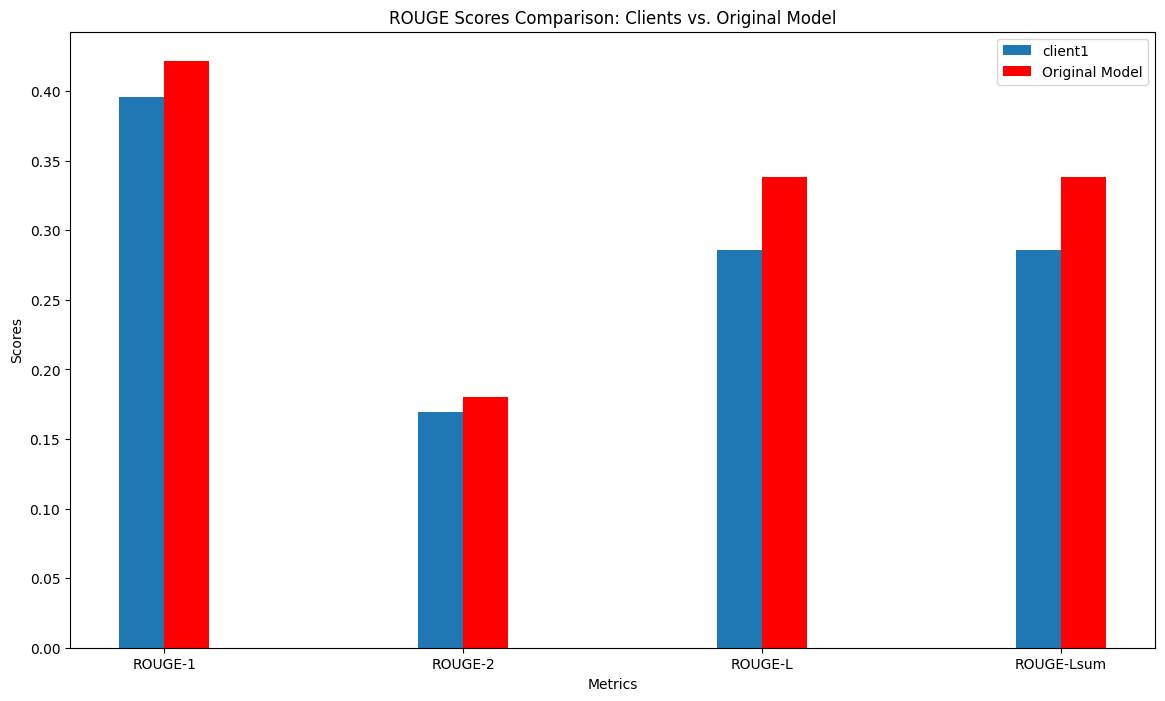

In [14]:
import json
import matplotlib.pyplot as plt
import numpy as np

# Function to read multiple JSON objects from a file
def read_multiple_json_objects(file_path):
    data = []
    with open(file_path, 'r') as file:
        for line in file:
            try:
                data.append(json.loads(line))
            except json.JSONDecodeError:
                continue
    return data


# Read data from the file
data = read_multiple_json_objects(file_path)

# Extract ROUGE scores and store them in a dictionary
rouge_data = {}
for item in data:
    client_name = item['sender']['name']
    scores = json.loads(item['data'])
    if client_name not in rouge_data:
        rouge_data[client_name] = {'ROUGE-1': [], 'ROUGE-2': [], 'ROUGE-L': [], 'ROUGE-Lsum': []}
    rouge_data[client_name]['ROUGE-1'].append(scores['rouge1'])
    rouge_data[client_name]['ROUGE-2'].append(scores['rouge2'])
    rouge_data[client_name]['ROUGE-L'].append(scores['rougeL'])
    rouge_data[client_name]['ROUGE-Lsum'].append(scores['rougeLsum'])

# Calculate average scores for each metric per client
clients = list(rouge_data.keys())
metrics = ['ROUGE-1', 'ROUGE-2', 'ROUGE-L', 'ROUGE-Lsum']
average_scores = {client: {metric: np.mean(rouge_data[client][metric]) for metric in metrics} for client in clients}

# Define the scores for the original model
original_model_scores = {
    'ROUGE-1': 0.42161291557556113,
    'ROUGE-2': 0.18035380596301792,
    'ROUGE-L': 0.3384439349963909,
    'ROUGE-Lsum': 0.33835653595561666
}

# Plotting the comparison
fig, ax = plt.subplots(figsize=(14, 8))
index = np.arange(len(metrics))
bar_width = 0.15  # Adjusted bar width to accommodate all entries

for i, client in enumerate(clients):
    avg_scores = [average_scores[client][metric] for metric in metrics]
    ax.bar(index + i * bar_width, avg_scores, bar_width, label=client)

# Adding the original model's scores
original_scores = [original_model_scores[metric] for metric in metrics]
ax.bar(index + len(clients) * bar_width, original_scores, bar_width, label='Original Model', color='r')

ax.set_xlabel('Metrics')
ax.set_ylabel('Scores')
ax.set_title('ROUGE Scores Comparison: Clients vs. Original Model')
ax.set_xticks(index + bar_width * (len(clients) / 2))
ax.set_xticklabels(metrics)
ax.legend()

plt.show()


In [13]:
import json
import matplotlib.pyplot as plt
import numpy as np

# Function to read JSON data from a file
def read_json_file(file_path):
    with open(file_path, 'r') as file:
        data = json.load(file)
    return data


# Read data
data = read_json_file(file_path)

# Extract ROUGE scores
rouge_data = {}
for item in data:
    client_name = item['sender']['name']
    scores = json.loads(item['data'])
    rouge_data[client_name] = {
        'ROUGE-1': scores['rouge1'],
        'ROUGE-2': scores['rouge2'],
        'ROUGE-L': scores['rougeL'],
        'ROUGE-Lsum': scores['rougeLsum']
    }

# Prepare data for plotting
metrics = ['ROUGE-1', 'ROUGE-2', 'ROUGE-L', 'ROUGE-Lsum']
scores = {metric: [] for metric in metrics}
clients = list(rouge_data.keys())

for client, metrics_scores in rouge_data.items():
    for metric in metrics:
        scores[metric].append(metrics_scores.get(metric, 0))

# Plotting with a line chart
fig, ax = plt.subplots(figsize=(10, 6))
for client in clients:
    ax.plot(metrics, [rouge_data[client][metric] for metric in metrics], marker='o', label=client)

# Add labels, title, and custom x-axis tick labels
ax.set_xlabel('Metrics')
ax.set_ylabel('Scores')
ax.set_title('ROUGE Scores by Client (Line Chart)')
ax.set_xticks(np.arange(len(metrics)))
ax.set_xticklabels(metrics)
ax.grid(True)
ax.legend()

# Show the plot
plt.show()


JSONDecodeError: Extra data: line 2 column 1 (char 468)

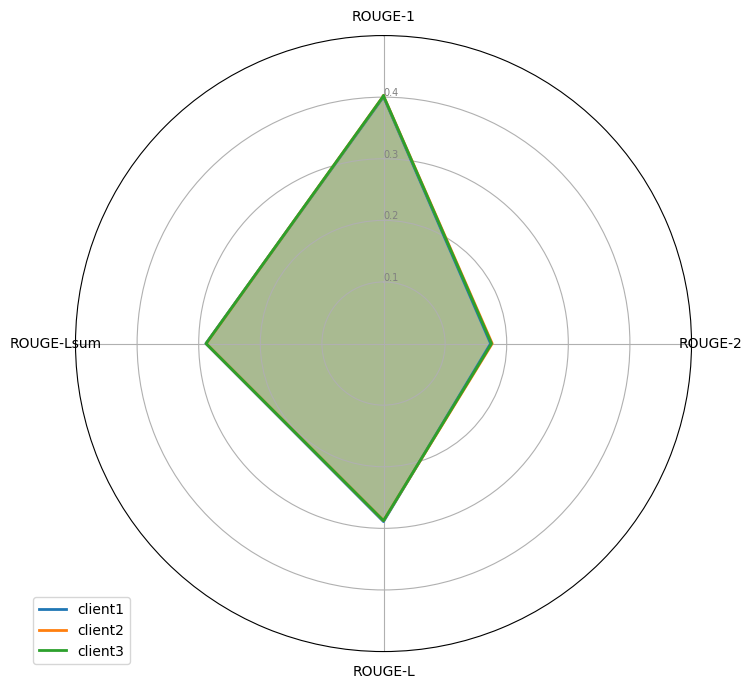

In [45]:
import json
import matplotlib.pyplot as plt
import numpy as np

# Function to read JSON data from a file
def read_json_file(file_path):
    with open(file_path, 'r') as file:
        data = json.load(file)
    return data


# Read data
data = read_json_file(file_path)

# Extract ROUGE scores
rouge_data = {}
for item in data:
    client_name = item['sender']['name']
    scores = json.loads(item['data'])
    rouge_data[client_name] = [
        scores['rouge1'],
        scores['rouge2'],
        scores['rougeL'],
        scores['rougeLsum']
    ]

# Prepare data for plotting
labels = ['ROUGE-1', 'ROUGE-2', 'ROUGE-L', 'ROUGE-Lsum']
num_vars = len(labels)

# Compute angle for each axis
angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist()
angles += angles[:1]  # Complete the loop

# Radar chart setup
fig, ax = plt.subplots(figsize=(8, 8), subplot_kw=dict(polar=True))

# Draw one axe per variable and add labels
ax.set_theta_offset(np.pi / 2)
ax.set_theta_direction(-1)
plt.xticks(angles[:-1], labels)

# Draw ylabels
ax.set_rlabel_position(0)
plt.yticks([0.1, 0.2, 0.3, 0.4], ["0.1", "0.2", "0.3", "0.4"], color="grey", size=7)
plt.ylim(0, 0.5)

# Plot each client's data
for client_name, scores in rouge_data.items():
    scores += scores[:1]  # Ensure the radar chart connects back to start
    ax.plot(angles, scores, linewidth=2, linestyle='solid', label=client_name)
    ax.fill(angles, scores, alpha=0.25)

# Add legend
plt.legend(loc='upper right', bbox_to_anchor=(0.1, 0.1))

# Show the plot
plt.show()


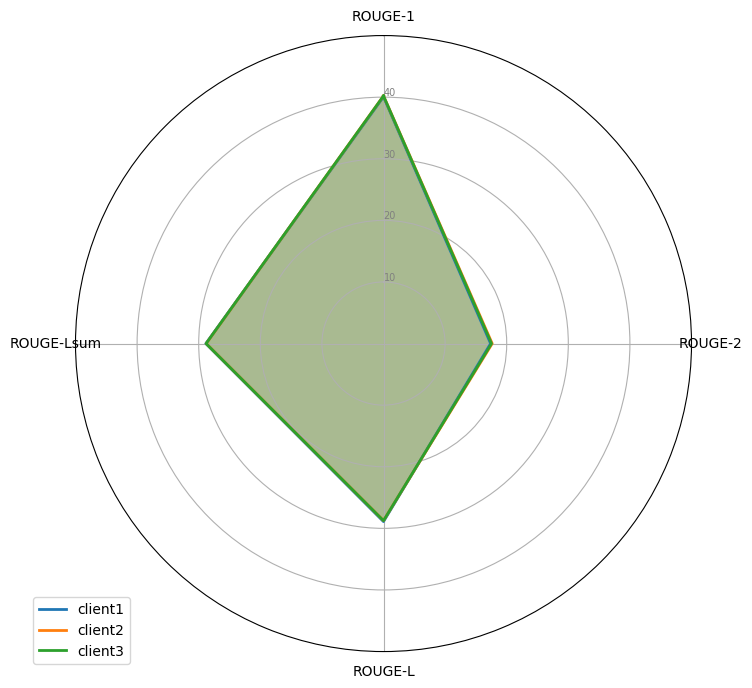

In [46]:
#scale 100 times

import json
import matplotlib.pyplot as plt
import numpy as np

# Function to read JSON data from a file
def read_json_file(file_path):
    with open(file_path, 'r') as file:
        data = json.load(file)
    return data


# Read data
data = read_json_file(file_path)

# Extract and scale ROUGE scores
scale_factor = 100  # Adjust this factor based on the desired scaling
rouge_data = {}
for item in data:
    client_name = item['sender']['name']
    scores = json.loads(item['data'])
    rouge_data[client_name] = [
        scores['rouge1'] * scale_factor,
        scores['rouge2'] * scale_factor,
        scores['rougeL'] * scale_factor,
        scores['rougeLsum'] * scale_factor
    ]

# Prepare data for plotting
labels = ['ROUGE-1', 'ROUGE-2', 'ROUGE-L', 'ROUGE-Lsum']
num_vars = len(labels)

# Compute angle for each axis
angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist()
angles += angles[:1]  # Complete the loop

# Radar chart setup
fig, ax = plt.subplots(figsize=(8, 8), subplot_kw=dict(polar=True))

# Draw one axe per variable and add labels
ax.set_theta_offset(np.pi / 2)
ax.set_theta_direction(-1)
plt.xticks(angles[:-1], labels)

# Draw ylabels
ax.set_rlabel_position(0)
plt.yticks([10, 20, 30, 40], ["10", "20", "30", "40"], color="grey", size=7)
plt.ylim(0, 50)

# Plot each client's data
for client_name, scores in rouge_data.items():
    scores += scores[:1]  # Ensure the radar chart connects back to start
    ax.plot(angles, scores, linewidth=2, linestyle='solid', label=client_name)
    ax.fill(angles, scores, alpha=0.25)

# Add legend
plt.legend(loc='upper right', bbox_to_anchor=(0.1, 0.1))

# Show the plot
plt.show()


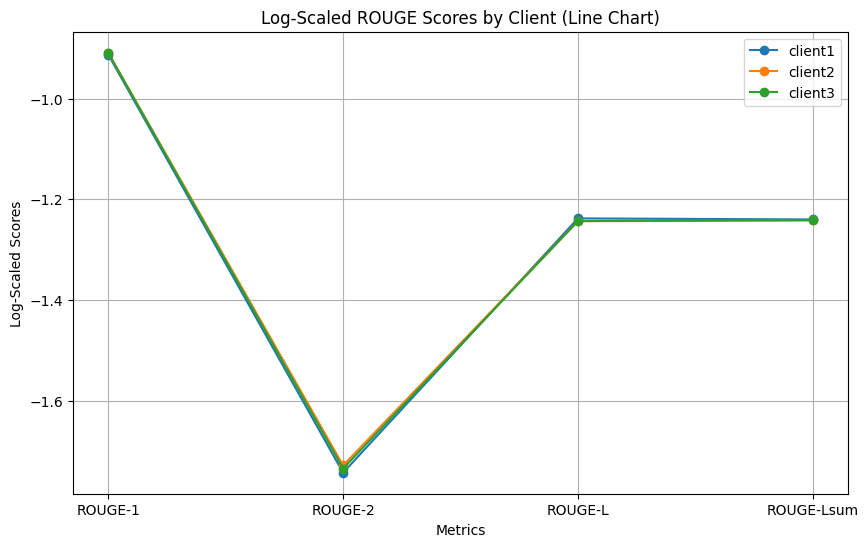

In [47]:
import json
import matplotlib.pyplot as plt
import numpy as np

# Function to read JSON data from a file
def read_json_file(file_path):
    with open(file_path, 'r') as file:
        data = json.load(file)
    return data


# Read data
data = read_json_file(file_path)

# Extract ROUGE scores and apply transformation
epsilon = 1e-3  # Small constant to avoid log(0)
rouge_data = {}
for item in data:
    client_name = item['sender']['name']
    scores = json.loads(item['data'])
    rouge_data[client_name] = {
        'ROUGE-1': np.log(scores['rouge1'] + epsilon),
        'ROUGE-2': np.log(scores['rouge2'] + epsilon),
        'ROUGE-L': np.log(scores['rougeL'] + epsilon),
        'ROUGE-Lsum': np.log(scores['rougeLsum'] + epsilon)
    }

# Prepare data for plotting
metrics = ['ROUGE-1', 'ROUGE-2', 'ROUGE-L', 'ROUGE-Lsum']
scores = {metric: [] for metric in metrics}
clients = list(rouge_data.keys())

for client, metrics_scores in rouge_data.items():
    for metric in metrics:
        scores[metric].append(metrics_scores[metric])

# Plotting with a line chart
fig, ax = plt.subplots(figsize=(10, 6))
for client in clients:
    ax.plot(metrics, [rouge_data[client][metric] for metric in metrics], marker='o', label=client)

# Add labels, title, and custom x-axis tick labels
ax.set_xlabel('Metrics')
ax.set_ylabel('Log-Scaled Scores')
ax.set_title('Log-Scaled ROUGE Scores by Client (Line Chart)')
ax.set_xticks(np.arange(len(metrics)))
ax.set_xticklabels(metrics)
ax.grid(True)
ax.legend()

# Show the plot
plt.show()
